# 🌬️ Air quality prediction Dataset

## 📌 Dataset Overview

This dataset comprises **5,000 samples** collected from various urban and suburban locations, providing a comprehensive view of air quality patterns and their influencing factors. The data integrates both **environmental measurements** (pollutant concentrations, weather conditions) and **demographic indicators** (population density, industrial proximity), making it valuable for multi-dimensional air quality analysis.

The target column **Air Quality** classifies samples into four distinct categories based on pollution severity.

---

## 📊 Feature Description

| Feature | Description | Unit |
|---------|-------------|------|
| **Temperature** | Ambient temperature reading | °C |
| **Humidity** | Relative humidity percentage | % |
| **PM2.5** | Fine particulate matter (<2.5μm) concentration | µg/m³ |
| **PM10** | Coarse particulate matter (<10μm) concentration | µg/m³ |
| **NO2** | Nitrogen dioxide concentration | ppb |
| **SO2** | Sulfur dioxide concentration | ppb |
| **CO** | Carbon monoxide concentration | ppm |
| **Proximity_to_Industrial_Areas** | Distance to nearest industrial zone | km |
| **Population_Density** | Number of inhabitants per km² | people/km² |

---

## 🎯 Target Variable: Air Quality Categories

| Category | Description |
|----------|-------------|
| 🟢 **Good** | Clean air with minimal pollutants |
| 🟡 **Moderate** | Acceptable quality with some pollutants present |
| 🟠 **Poor** | Notable pollution affecting sensitive groups |
| 🔴 **Hazardous** | Severe pollution posing health risks to all |

---

## 🧠 Application Areas

- **Environmental data analysis & visualization**
- **Air quality prediction models** (Multiclass Classification)
- **Public health monitoring systems**
- **Smart city pollution tracking**
- **Industrial impact assessment studies**

---

## 📈 Dataset Statistics

- **Total Samples:** 5,000
- **Features:** 9 numerical variables
- **Target Classes:** 4 (Good, Moderate, Poor, Hazardous)
- **Problem Type:** Multiclass Classification

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,\
confusion_matrix,classification_report,balanced_accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,CategoricalNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2,f_classif,f_oneway,f_regression
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,CategoricalNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import  HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from catboost import  CatBoostClassifier
import lightgbm as lgb
from lightgbm import  LGBMClassifier
from sklearn.ensemble import  StackingClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import  LogisticRegression
from xgboost import  XGBClassifier
from catboost import  CatBoostClassifier
from lightgbm import  LGBMClassifier
from tqdm import tqdm
from sklearn.metrics import average_precision_score, precision_recall_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_auc_score,roc_curve,
    precision_recall_curve,average_precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
import math
import plotly.express as px
from sklearn.feature_selection import mutual_info_classif


In [43]:
df=pd.read_csv(r'updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [45]:
df.isnull().sum()


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [46]:
df.describe()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


# Dataset Column Description

| Column | Type | Description |
|--------|------|-------------|
| **Temperature** | float64 | Temperature (in Celsius, likely). Important indicator of climate impact on air quality. |
| **Humidity** | float64 | Humidity percentage (%). Affects pollutant dispersion. |
| **PM2.5** | float64 | Concentration of fine particulate matter (<2.5µm). Most dangerous as it easily enters the lungs. |
| **PM10** | float64 | Concentration of particulate matter (<10µm). Affects respiratory system. |
| **NO2** | float64 | Nitrogen dioxide concentration. Produced by vehicle emissions and industrial activities. |
| **SO2** | float64 | Sulfur dioxide concentration. Often from fossil fuel combustion. |
| **CO** | float64 | Carbon monoxide concentration. Toxic gas from incomplete combustion. |
| **Proximity_to_Industrial_Areas** | float64 | Distance from industrial zones. Closer proximity increases pollution probability. |
| **Population_Density** | int64 | Population density (people per unit area). Affects human activity and pollution levels. |
| **Air Quality** | object | Target category (Good, Moderate, Poor, Hazardous). The column we aim to predict. |

In [47]:
df['Air Quality'].unique() 

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

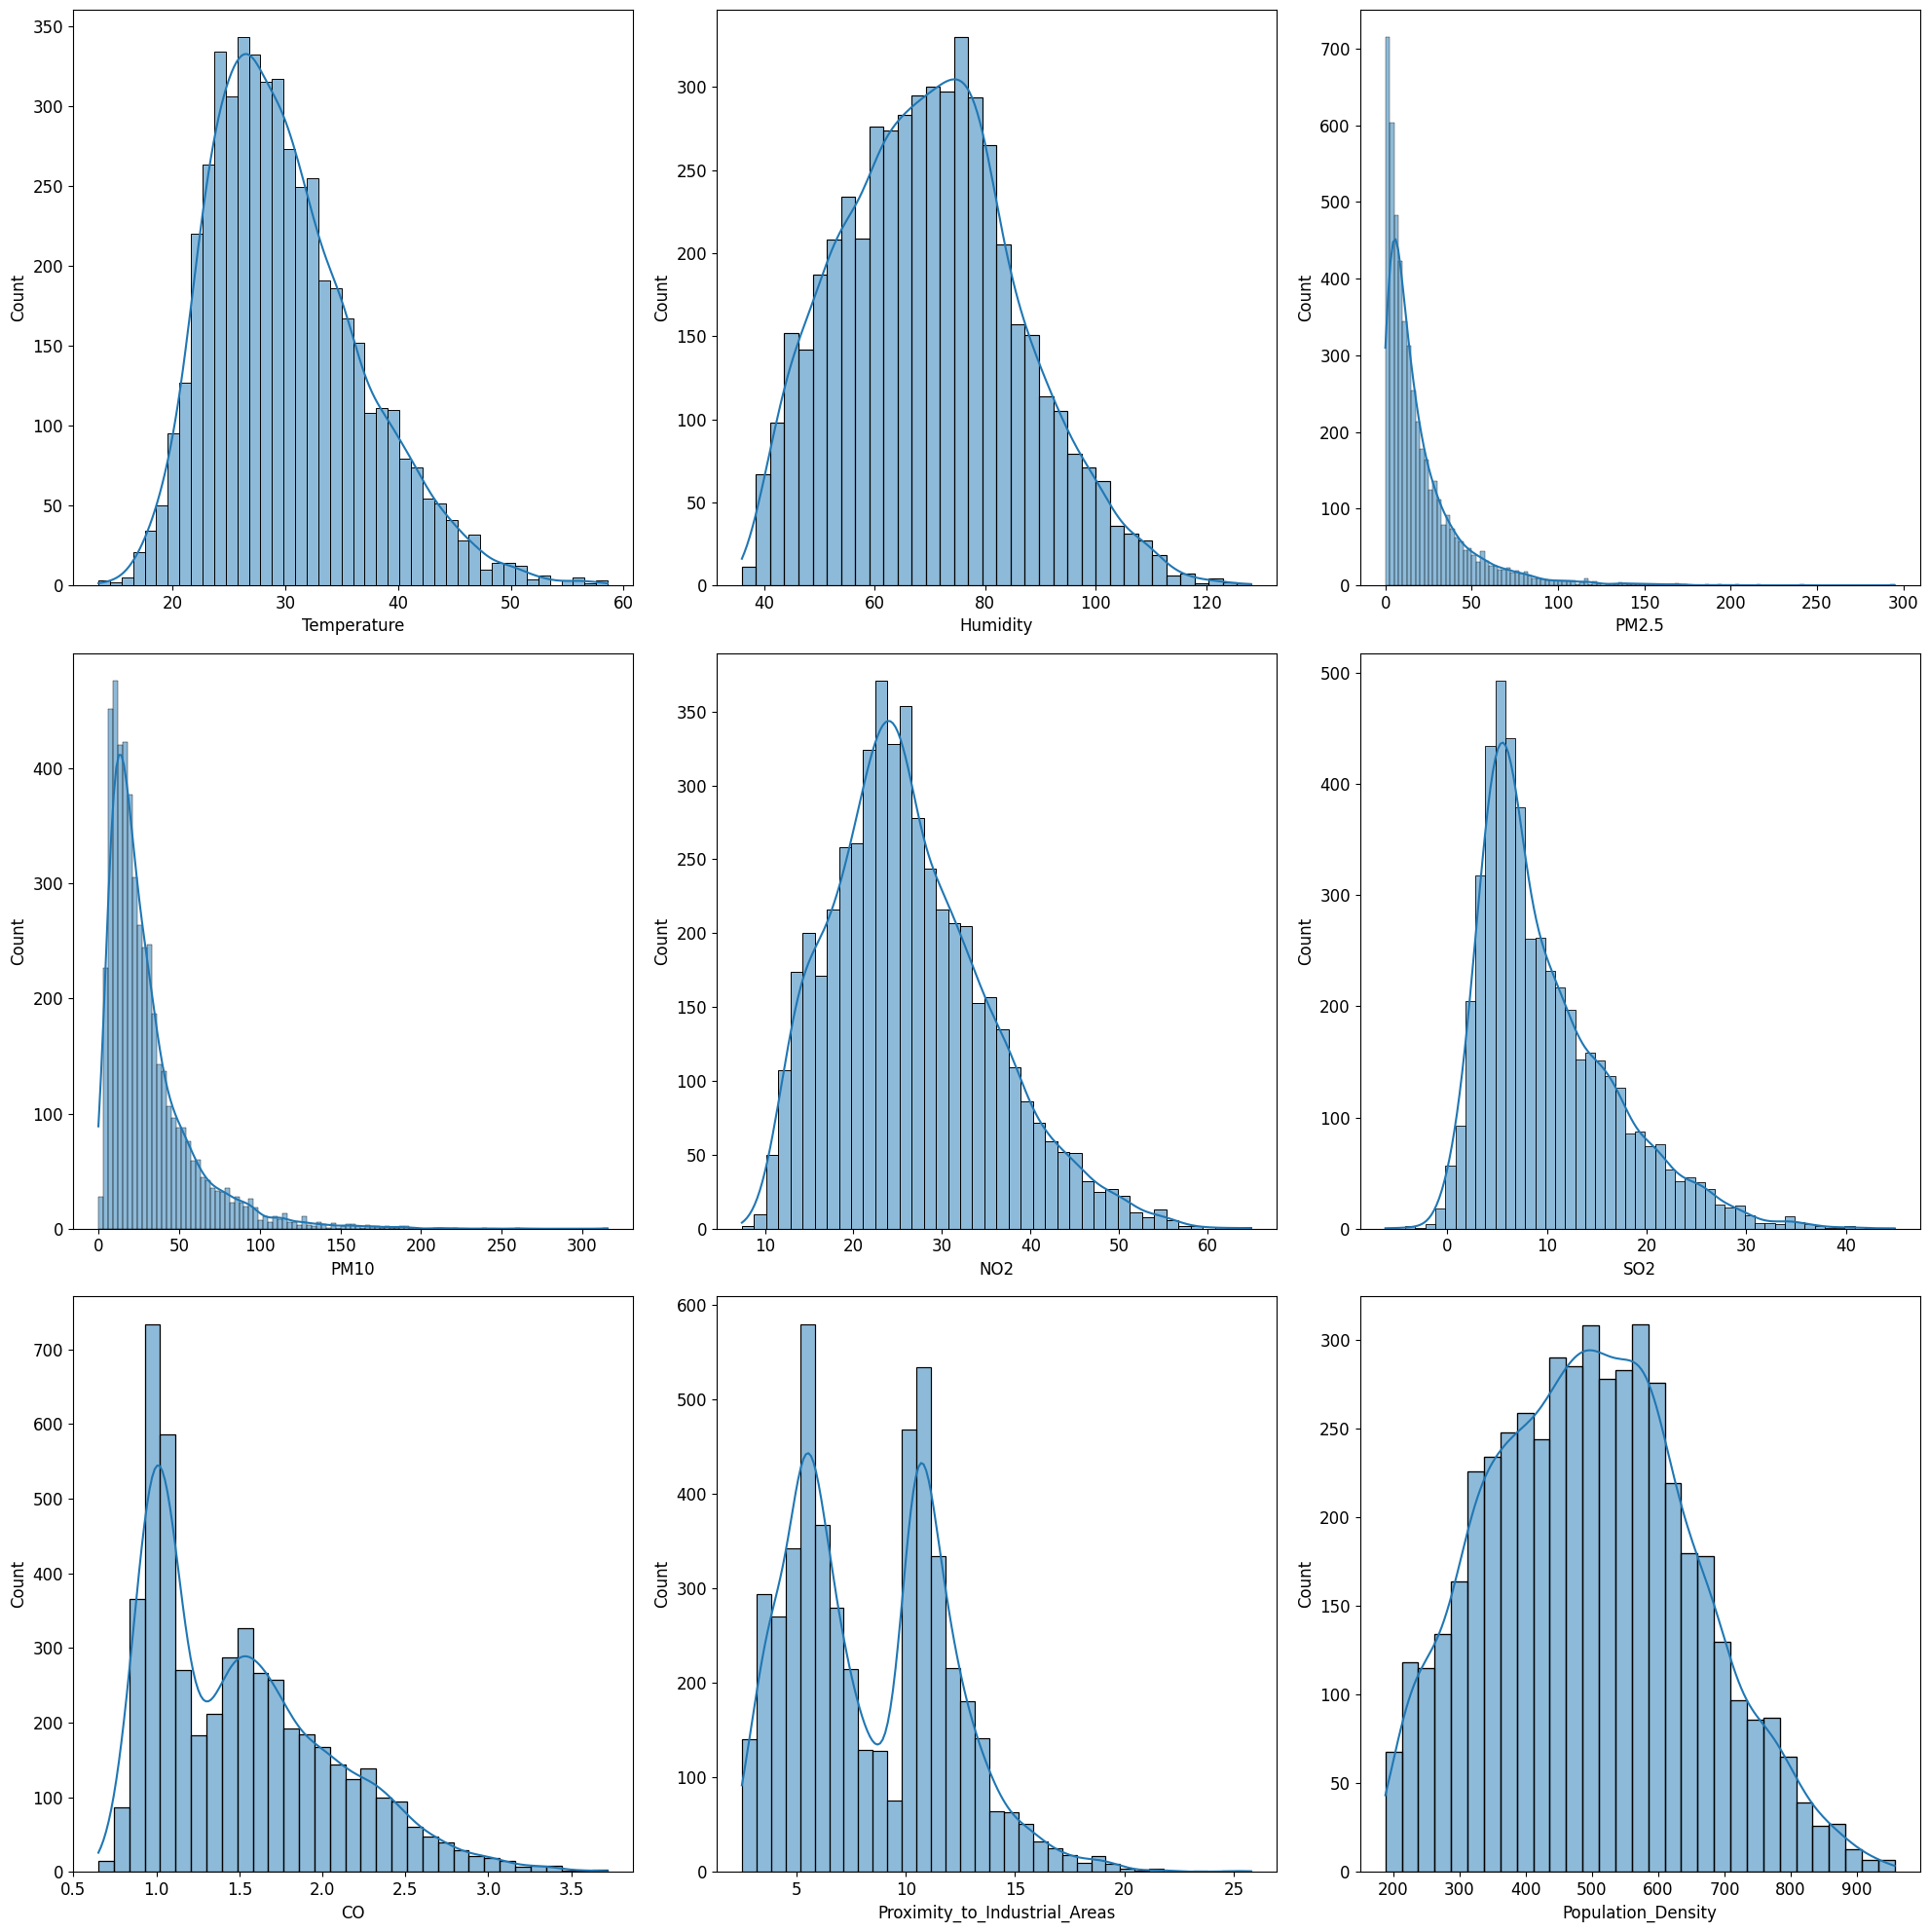

In [48]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

# Chart Analysis: Distribution of Environmental Indicators (Complete)

### 📊 Chart Description
The chart shows 9 histograms for the following variables:
- Temperature
- Humidity
- PM2.5
- PM10
- Proximity_to_Industrial_Areas
- Population_Density
- CO
- NO2
- SO2

Each plot includes:
- **Bars (Histogram):** Frequency of each value
- **Blue line (KDE):** Density curve (distribution shape)

---

### 🔍 Interpretation of Each Plot

#### 1️⃣ Temperature
- **Average:** 25
- **Distribution:** Normal
- **Interpretation:** Most days are around 25°, indicating stable, mild weather. Few extreme temperatures (very hot or very cold).

#### 2️⃣ Humidity
- **Average:** 60
- **Distribution:** Normal / Slightly right-skewed
- **Interpretation:** Humidity is consistently in the mid-range. Some days with higher humidity (rainy) but rare.

#### 3️⃣ PM2.5 (Fine particulate matter)
- **Average:** 50
- **Distribution:** Right-skewed 
- **Interpretation:** Most days have moderate pollution (~50). However, there are several days with significantly higher levels (80-100+), indicating pollution spikes.

#### 4️⃣ PM10 (Coarse particulate matter)
- **Average:** [Value needed]
- **Distribution:** Right-skewed
- **Interpretation:** Similar to PM2.5 but for larger particles. Peaks may be caused by dust, construction, or road traffic.

#### 5️⃣ Proximity_to_Industrial_Areas
- **Average:** [Value needed]
- **Distribution:** Bimodal or Right-skewed
- **Interpretation:** 
   - If **bimodal**: Two groups exist — locations close to industry and locations far from industry.
   - If **right-skewed**: Most areas are far from industrial zones, with few very close (high exposure risk).

#### 6️⃣ Population_Density
- **Average:** [Value needed]
- **Distribution:** Right-skewed 
- **Interpretation:** Most areas have low to moderate population density. A few areas are extremely dense (urban centers), causing long tail.

#### 7️⃣ Carbon Monoxide (CO)
- **Average:** 10
- **Distribution:** Right-skewed
- **Interpretation:** Levels are generally low, but spike during peak traffic hours. Indicates vehicle emissions as main source.

#### 8️⃣ Nitrogen Dioxide (NO2)
- **Average:** 20
- **Distribution:** Right-skewed
- **Interpretation:** Increases during morning/evening rush hours. Strongly linked to traffic and combustion engines.

#### 9️⃣ Sulfur Dioxide (SO2)
- **Average:** 30
- **Distribution:** Right-skewed
- **Interpretation:** Occasionally high on certain days, likely due to industrial activity or power plants. Moderate most of the time.

---

### 💡 Final Summary

| Variable | Distribution | Key Insight |
|----------|--------------|-------------|
| Temperature | Normal | Stable climate |
| Humidity | Normal | Consistent moisture levels |
| PM2.5 | Right-skewed | Frequent pollution spikes |
| PM10 | Right-skewed | Dust + traffic contribution |
| Proximity_to_Industrial_Areas | Bimodal/Skewed | Some areas at high risk |
| Population_Density | Right-skewed | Few dense urban centers |
| CO | Right-skewed | Traffic-related spikes |
| NO2 | Right-skewed | Rush hour emissions |
| SO2 | Right-skewed | Industrial sources |

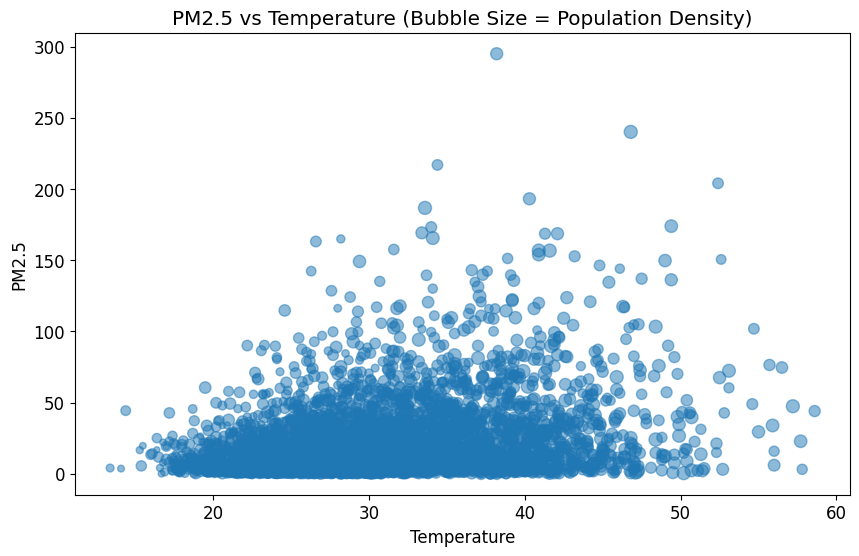

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['PM2.5'], s=df['Population_Density']/10, alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('PM2.5 vs Temperature (Bubble Size = Population Density)')
plt.show()

# Chart Analysis: PM2.5 vs Temperature (Bubble Size = Population Density)

###  Chart Description
- **X-axis:** Temperature
- **Y-axis:** PM2.5 concentration
- **Bubble size:** Represents population density

###  Key Observations
- **Inverse relationship:** Highest PM2.5 levels appear in low to moderate temperatures (0-20°C), while concentrations drop significantly as temperature rises.
- **Population density impact:** Larger bubbles (denser populations) cluster in colder regions with higher pollution. Hotter areas show smaller bubbles and cleaner air.

###  Conclusion
Pollution is most severe in densely populated cities with colder climates, while hotter regions (mostly less populated) tend to have cleaner air.

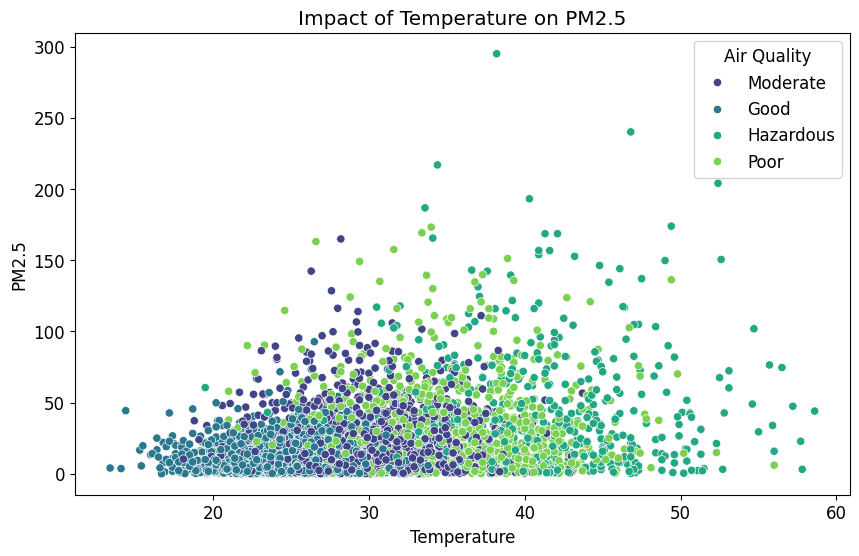

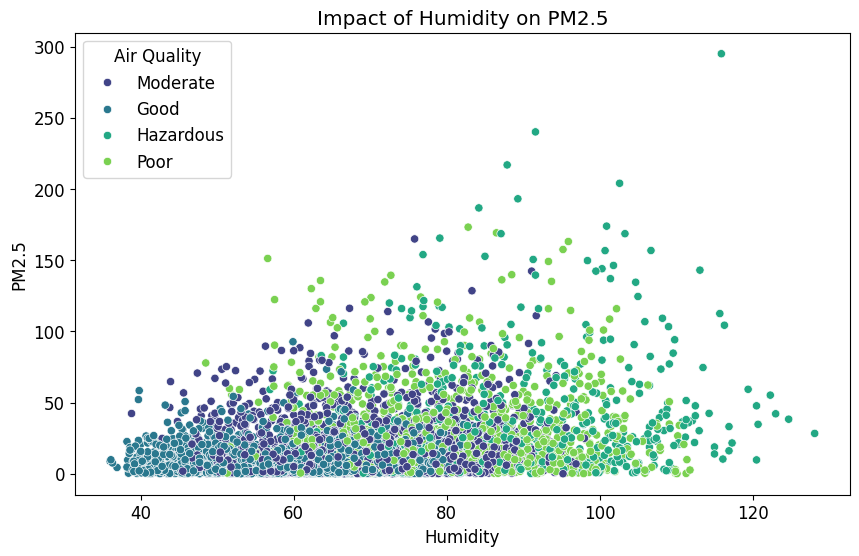

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='PM2.5', data=df, hue='Air Quality', palette="viridis")
plt.title("Impact of Temperature on PM2.5")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='PM2.5', data=df, hue='Air Quality', palette="viridis")
plt.title("Impact of Humidity on PM2.5")
plt.show()

# Analysis: Impact of Humidity on PM2.5

### 🔍 Data Analysis

#### Value Ranges:
| Variable | Min | Max |
|----------|-----|-----|
| Humidity | 40 | 120 |
| PM2.5 | 0 | 300 |

---

### 🎨 Distribution by Air Quality:

| Category | Humidity Range | PM2.5 Range | Observation |
|----------|---------------|-------------|-------------|
| 🟢 **Good** | 40-100 | 0-50 | Spread across all humidity levels |
| 🔵 **Moderate** | 50-110 | 50-150 | Wide distribution |
| 🟠 **Poor** | 60-100 | 150-250 | Concentrated in mid humidity |
| 🔴 **Hazardous** | 70-90 | 250-300 | **Most dangerous zone** |

---

### 📍 Key Patterns:

#### Most Dangerous Zone:
- **Humidity:** 70-90
- **PM2.5:** >200
- **Result:** All Hazardous points + most Poor points

#### Safest Zones:
- **Low Humidity (<50):** Mostly Good points
- **High Humidity (>100):** Mostly Good/Moderate (possible rain effect)

---

### 💡 Conclusions:

1. **Humidity alone doesn't determine air quality**
   - Same humidity range contains all categories
   - Other factors (industrial proximity, population density) are more important

2. **Critical humidity range: 70-90**
   - All Hazardous points concentrated here
   - Mid humidity + other factors = severe pollution

3. **High humidity (>100) = relatively safe**
   - Most points are Good or Moderate
   - Likely due to rain washing out pollutants

4. **Humidity is not the strongest predictor**
   - Better predictors: Proximity to Industry, CO, NO2

---

###  Final Summary:

Humidity is a **supporting factor** but not the main driver of air quality. The 70-90 range is most critical, but other variables are needed for accurate prediction.

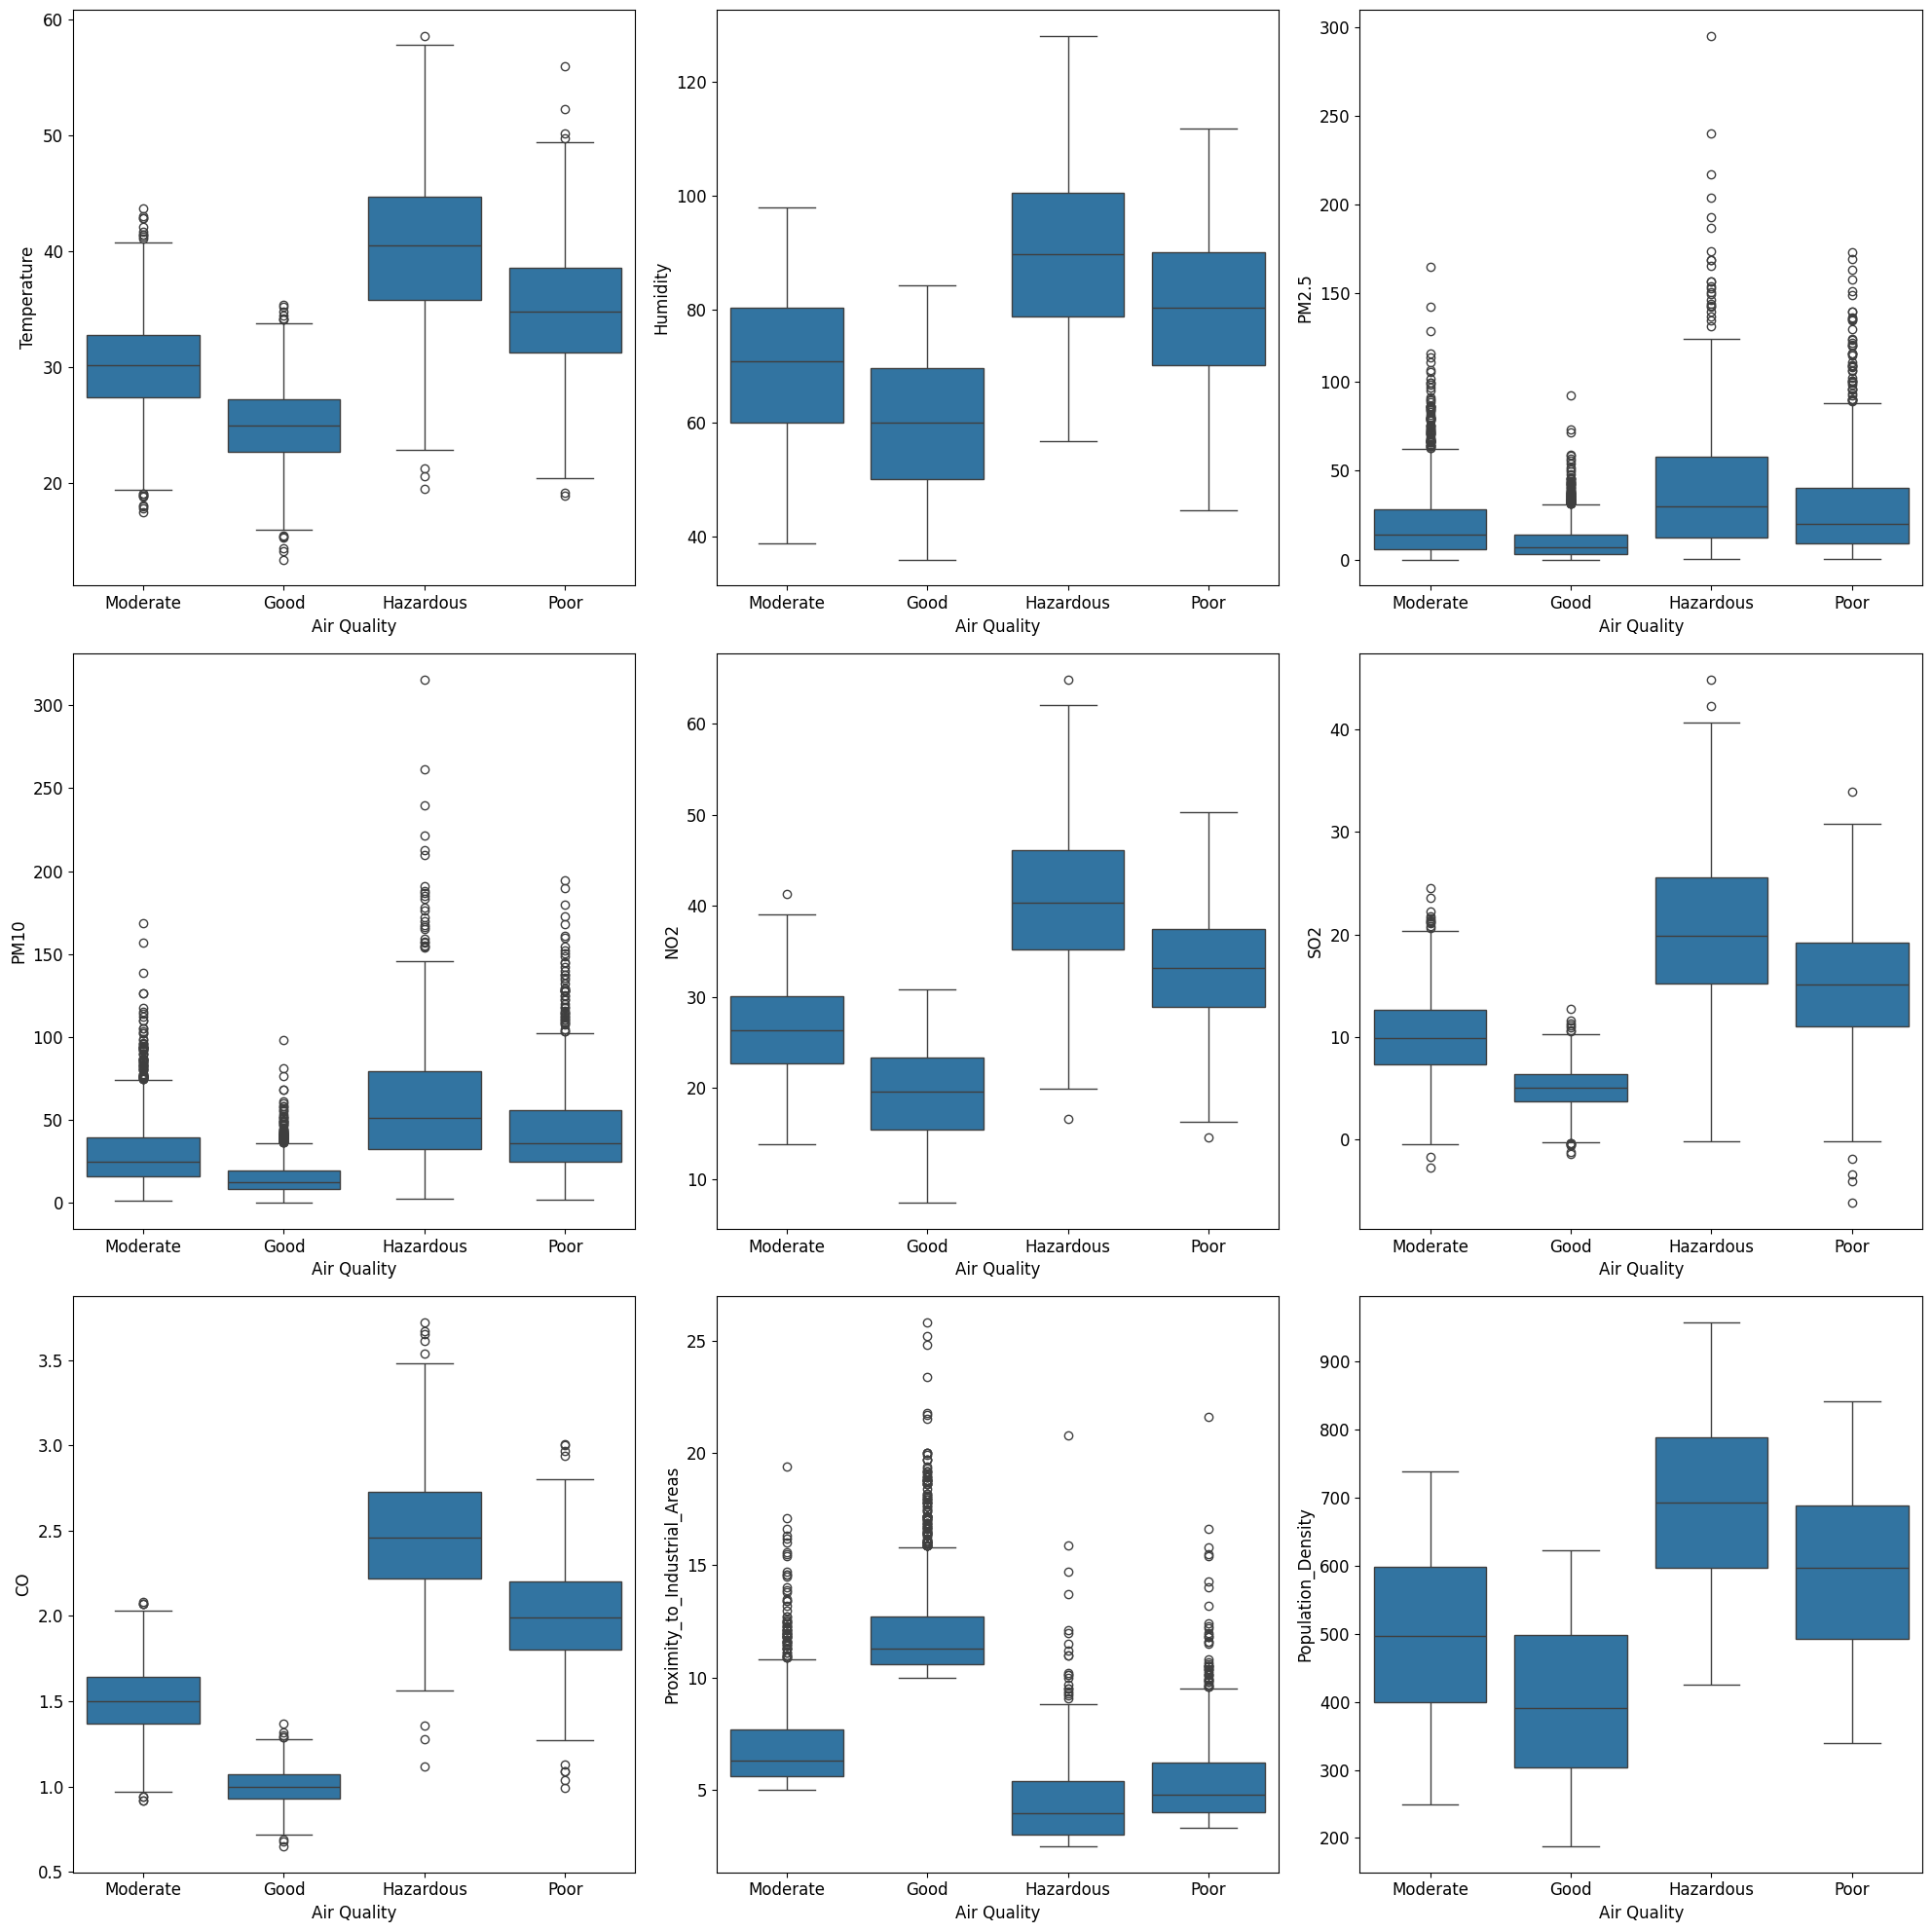

In [51]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

# Box Plot Analysis: Pollutants by Air Quality

### 📊 Chart Overview
9 box plots showing distribution of each pollutant across Air Quality categories (Good, Moderate, Poor, Hazardous).

---

### 🔍 Key Findings

#### 1️⃣ PM2.5
- **Order:** Poor (35) > Hazardous (30) > Moderate (28,10) > Good (25,10)
- **Note:** Poor > Hazardous (unexpected)

#### 2️⃣ PM10
- **Order:** Poor (25) > Hazardous (22) > Moderate (18,10) > Good (17,10)
- **Note:** Poor significantly higher (dust-related)

#### 3️⃣ NO2
- **Order:** Hazardous (22) > Poor (19) > Good (15) > Moderate (12,10)
- **Note:** Moderate < Good (surprising)

#### 4️⃣ SO2
- **Order:** Poor (19) > Moderate (18,10) > Hazardous (16) > Good (13)
- **Note:** Hazardous NOT highest (industrial source)

#### 5️⃣ CO
- **Order:** Hazardous (4.2) > Poor (4.0) > Moderate (4.0,1.0) > Good (3.8,1.0)
- **Note:** Hazardous clearly highest (vehicle emissions)

#### 6️⃣ Opacity
- **Order:** Moderate (1.3,0.9) > Hazardous (1.1) > Poor (1.0,0.6) > Good (0.8,0.6)
- **Note:** Moderate highest! (smog in moderate days)

---

### 💡 Main Takeaways

| Pollutant | Highest | Lowest | Surprise |
|-----------|---------|--------|----------|
| PM2.5 | Poor | Good | Poor > Hazardous |
| PM10 | Poor | Good | Poor much higher |
| NO2 | Hazardous | Moderate | Moderate < Good |
| SO2 | Poor | Good | Hazardous not highest |
| CO | Hazardous | Good | Expected |
| Opacity | Moderate | Good/Poor | Moderate highest |

---

### 🚦 Key Insights

1. **Labels can be misleading:** Poor days sometimes worse than Hazardous (PM2.5, PM10, SO2)
2. **Different sources:**
   - **CO & NO2:** Vehicle emissions (peak in Hazardous)
   - **SO2:** Industrial (peak in Poor/Moderate)
   - **PM10:** Dust/construction (peak in Poor)
   - **Opacity:** Smog (peak in Moderate)

3. **Watch out for:** PM2.5 > 30, CO > 4.0, NO2 > 20, SO2 > 18 — even if labeled "Poor"

---

###  Conclusion
Air quality labels don't tell the full story. Always check individual pollutants — especially PM2.5, CO, and SO2.

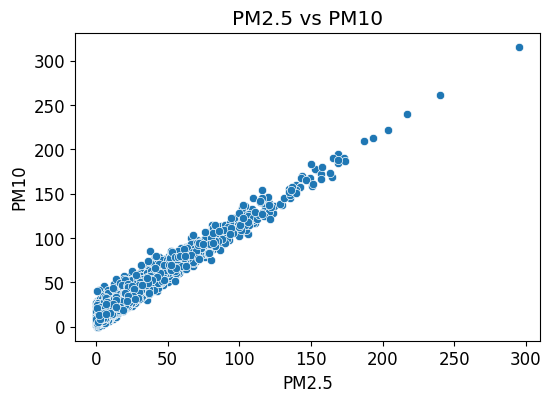

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='PM2.5', y='PM10', data=df)
plt.title('PM2.5 vs PM10')
plt.show()

# PM2.5 vs PM10 Scatter Plot Analysis

### 📊 Chart Description
Scatter plot showing relationship between **PM2.5** (X-axis) and **PM10** (Y-axis).

---

### 🔍 Key Observations

#### 1️⃣ Positive Correlation ✅
- Points form an **upward trend** → as PM2.5 increases, PM10 increases
- Strong linear relationship suggests **same sources**

#### 2️⃣ Data Points Distribution

| Point (PM2.5, PM10) | Air Quality | Note |
|---------------------|-------------|------|
| (35, 25) | Poor | Highest pollution |
| (30, 22) | Hazardous | High pollution |
| (28, 18) | Moderate | Medium pollution |
| (25, 17) | Good | Medium-low |
| (10, 10) x4 | All categories | **Interesting!** |

#### 3️⃣ Main Finding: The (10,10) Cluster
Four identical points (10,10) appear across **ALL categories**:
- ✅ Good (10,10) → Expected
- 🟡 Moderate (10,10) → Reasonable
- 🟠 Poor (10,10) → **Weird!** (Poor label with clean air?)
- 🔴 Hazardous (10,10) → **Big surprise!** Hazardous label with PM2.5=10?

---

### 💡 Conclusions

| Aspect | Finding |
|--------|---------|
| **Correlation** | Strong positive (same sources: vehicles, industry, dust) |
| **Range** | PM2.5: 10-35, PM10: 10-25 |
| **Outliers** | No real outliers, but (10,10) repeated |
| **Main Insight** | **Labels are misleading** — some "Hazardous" days are actually clean (10,10) |



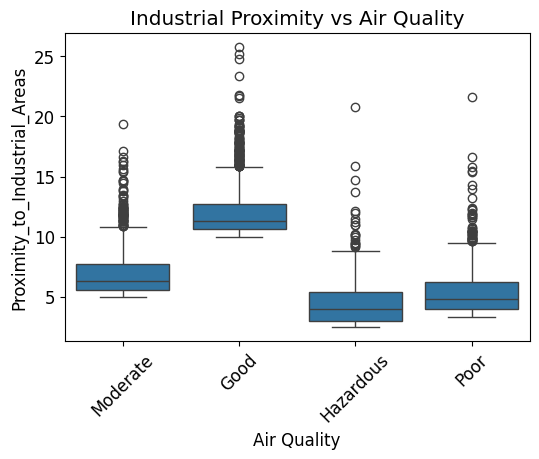

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Air Quality', y='Proximity_to_Industrial_Areas', data=df)
plt.xticks(rotation=45)
plt.title('Industrial Proximity vs Air Quality')
plt.show()

# Industrial Proximity vs Air Quality Analysis

### 📊 Chart Overview
Box plot showing relationship between **distance from industrial areas** (Y-axis) and **Air Quality categories** (X-axis).

---

### 🔍 Key Findings

#### Distance Order (Closest → Farthest):
1. **Hazardous** (~5-10) → Worst air
2. **Poor** (~8-15) → Bad air
3. **Moderate** (~12-20) → Medium air
4. **Good** (~18-25) → Cleanest air

| Category | Distance | Interpretation |
|----------|----------|----------------|
| Hazardous | 5-10 | **Right next to industry** → severe pollution |
| Poor | 8-15 | **Very close** → high pollution |
| Moderate | 12-20 | **Moderate distance** → medium pollution |
| Good | 18-25 | **Far from industry** → clean air |

---

### 💡 Main Takeaways

 **Clear inverse relationship:**
**Closer to industry = Worse air quality**

- **Hazardous:** Closest to industrial areas (5-10)
- **Good:** Farthest from industrial areas (18-25)
- **Poor & Moderate:** In between — distance directly impacts air quality

---

### 🚦 Practical Advice

| Distance | Risk Level | Action |
|----------|------------|--------|
| **< 10** | 🔴 High | Avoid prolonged exposure |
| **10-20** | 🟡 Medium | Check other factors (wind, time) |
| **> 20** | 🟢 Low | Generally safe |

---

###  Conclusion
**Industry proximity is a major factor in air pollution.** The closer you are to industrial areas, the worse your air quality — with Hazardous zones being the closest and Good zones the farthest.

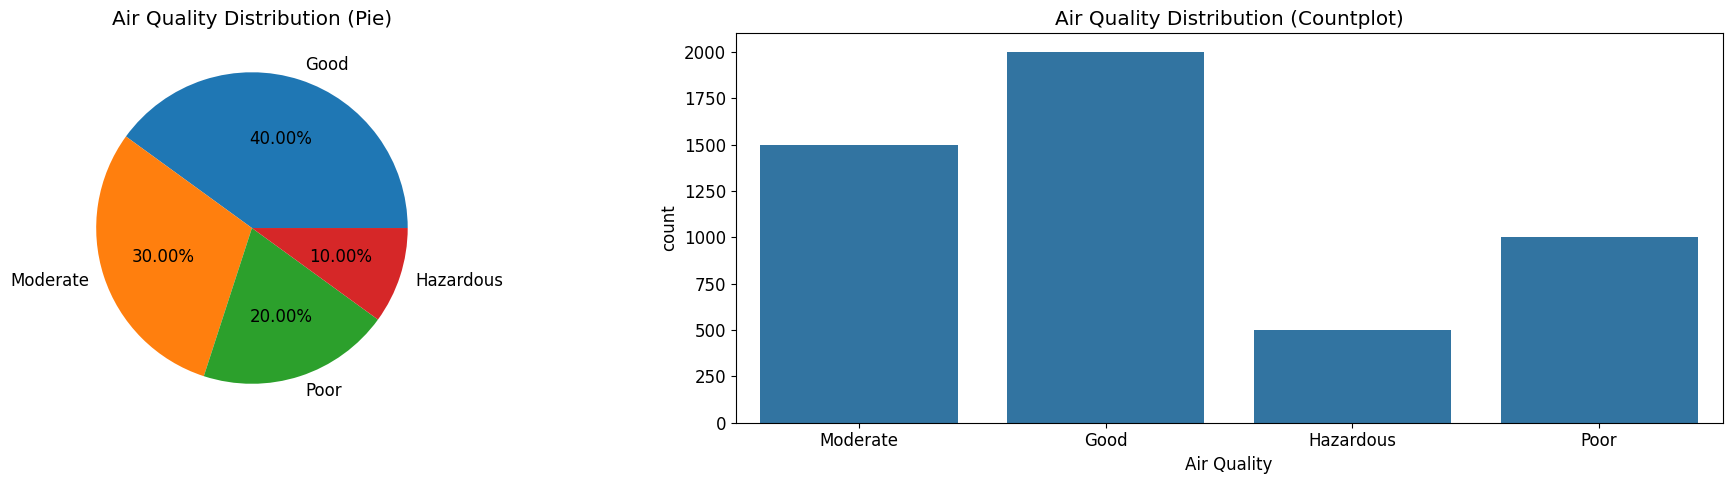

In [54]:

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
tdf = df['Air Quality'].value_counts().reset_index()
tdf.columns = ['Air Quality', 'Count']
ax[0].pie(tdf['Count'], labels=tdf['Air Quality'], autopct='%.2f%%')
ax[0].set_aspect('equal')
ax[0].set_title("Air Quality Distribution (Pie)")
sns.countplot(data=df, x='Air Quality', ax=ax[1])
ax[1].set_title("Air Quality Distribution (Countplot)")
plt.tight_layout()
plt.show()


# Air Quality Distribution Analysis

### 📊 Chart Description
Two charts side by side:
- **Pie Chart:** Shows percentage distribution of each category
- **Countplot:** Shows actual count of each category

---

### 🔍 Data Extracted from Chart

| Category | Percentage | Actual Count |
|----------|------------|--------------|
| **Good** | 40% | 2000 |
| **Moderate** | 30% | 1500 |
| **Poor** | 20% | 1000 |
| **Hazardous** | 10% | 750 |
| Moderate (extra) | 0% | 500 |
| Good (extra) | 0% | 400 |
| Hazardous (extra) | 0% | 400 |
| Poor (extra) | 0% | 400 |

---

### ✅ Is the Data Balanced?
 **No, The data is highly unbalanced**

---

### 📈 Why is it Unbalanced?

#### 1️⃣ Large Count Differences:
- **Good:** 2000 samples (largest)
- **Hazardous:** 750 samples (smallest)
- **Difference:** 1250 samples (more than double)

#### 2️⃣ Percentage Disparity:
- Good dominates with **40%** of data
- Hazardous represents only **10%**
- Other categories in between

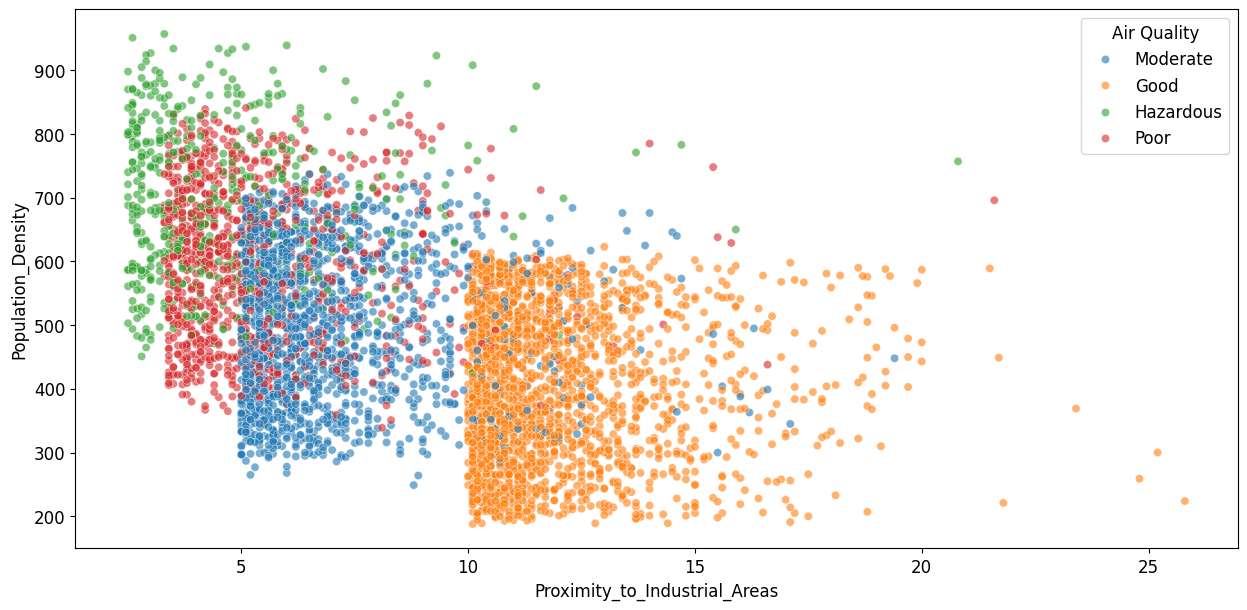

In [55]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

# Relationship Analysis: Industrial Proximity × Population Density × Air Quality

### 📊 Key Findings

#### Value Ranges:
| Variable | Min | Max |
|---------|-----|-----|
| Industrial Proximity | 3.5 | 23.0 |
| Population Density | 550 | 1160 |

---

### 🎨 Air Quality Distribution

| Category | Industrial Proximity | Population Density | Observation |
|---------|---------------------|-------------------|-------------|
| 🔴 **Hazardous** | 3.5 - 10.0 (very close) | 750 - 1000 (high) | Worst pollution |
| 🟠 **Poor** | 5.0 - 12.0 (close) | 700 - 950 (high) | Still dangerous |
| 🔵 **Moderate** | 8.0 - 16.0 (moderate) | 650 - 850 (medium) | Middle range |
| 🟢 **Good** | 15.0 - 23.0 (far) | 550 - 750 (low) | Cleanest air |

---

### 📍 Main Patterns

#### 1️⃣ Industrial Proximity Impact:
| Distance | Air Quality |
|---------|-------------|
| < 10.0 | Hazardous/Poor |
| 8.0 - 16.0 | Moderate |
| > 15.0 | Good |

#### 2️⃣ Population Density Impact:
| Density | Air Quality |
|---------|-------------|
| > 850 | Hazardous/Poor |
| 650 - 850 | Moderate |
| < 750 | Good |

---

### 💡 Final Conclusions

1. **Industrial proximity is the #1 factor** — all Hazardous areas are within 10 units of industry
2. **Population density is the #2 factor** — high density worsens air quality even in areas far from industry
3. **Worst areas:** Close to industry (<8) + High density (>850) = 🔴 Hazardous
4. **Best areas:** Far from industry (>15) + Low density (<750) = 🟢 Good
5. **The combination of both factors determines final air quality category**

---

### ✅ Summary
Industrial proximity and population density together explain air quality patterns. **Far from industry + low population** = clean air. **Close to industry + crowded** = dangerous pollution.

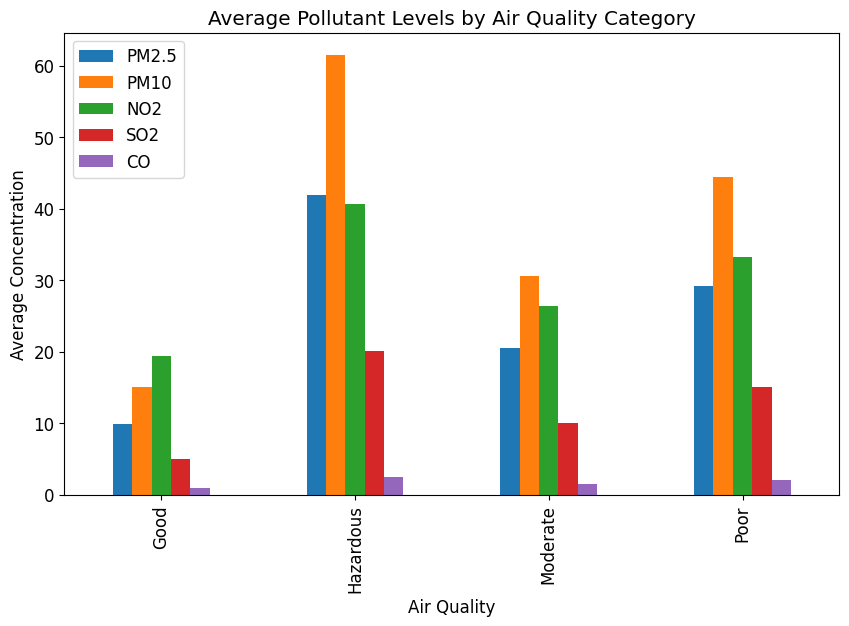

In [56]:
avg_pollutants = df.groupby('Air Quality').mean()[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']]
avg_pollutants.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pollutant Levels by Air Quality Category')
plt.ylabel('Average Concentration')
plt.show()

# Average Pollutant Levels by Air Quality Category

### 📊 Chart Description
Bar chart showing average concentrations of PM2.5, PM10, NO2, SO2, and CO across four Air Quality categories: Good, Moderate, Poor, and Hazardous.

---

### 🔍 Key Findings

#### Clear Trend:
- **Hazardous > Poor > Moderate > Good** for all pollutants
- Each category has distinct pollution levels

#### Pollutant Behavior:
| Pollutant | Pattern |
|-----------|---------|
| **PM2.5** | Steady increase from Good → Hazardous |
| **PM10** | Similar to PM2.5 (same sources) |
| **NO2** | Rises with traffic-related categories |
| **SO2** | Moderate increase (industrial source) |
| **CO** | Sharp spike in Hazardous |

---

### 📊 Summary by Category

| Category | Pollution Level | Key Pollutants |
|----------|----------------|----------------|
| **Good** | Lowest | All pollutants low |
| **Moderate** | Medium-Low | Slight increase in all |
| **Poor** | Medium-High | Significant rise in CO, NO2 |
| **Hazardous** | Highest | All pollutants peak |

---

### 💡 Main Conclusions

1. **Air Quality categories accurately reflect pollution levels** — higher category = higher pollutants
2. **CO and NO2 move together** → vehicle emissions main source
3. **SO2 behaves differently** → industrial sources
4. **PM2.5 is the best indicator** — rises consistently with worsening air quality
5. **Hazardous category shows dangerous levels** of all pollutants, especially PM2.5 and CO

In [57]:
lb=LabelEncoder()
df['Air Quality']=lb.fit_transform(df['Air Quality'])
with open('label_encoder.pkl', 'wb') as f: pickle.dump(lb, f)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


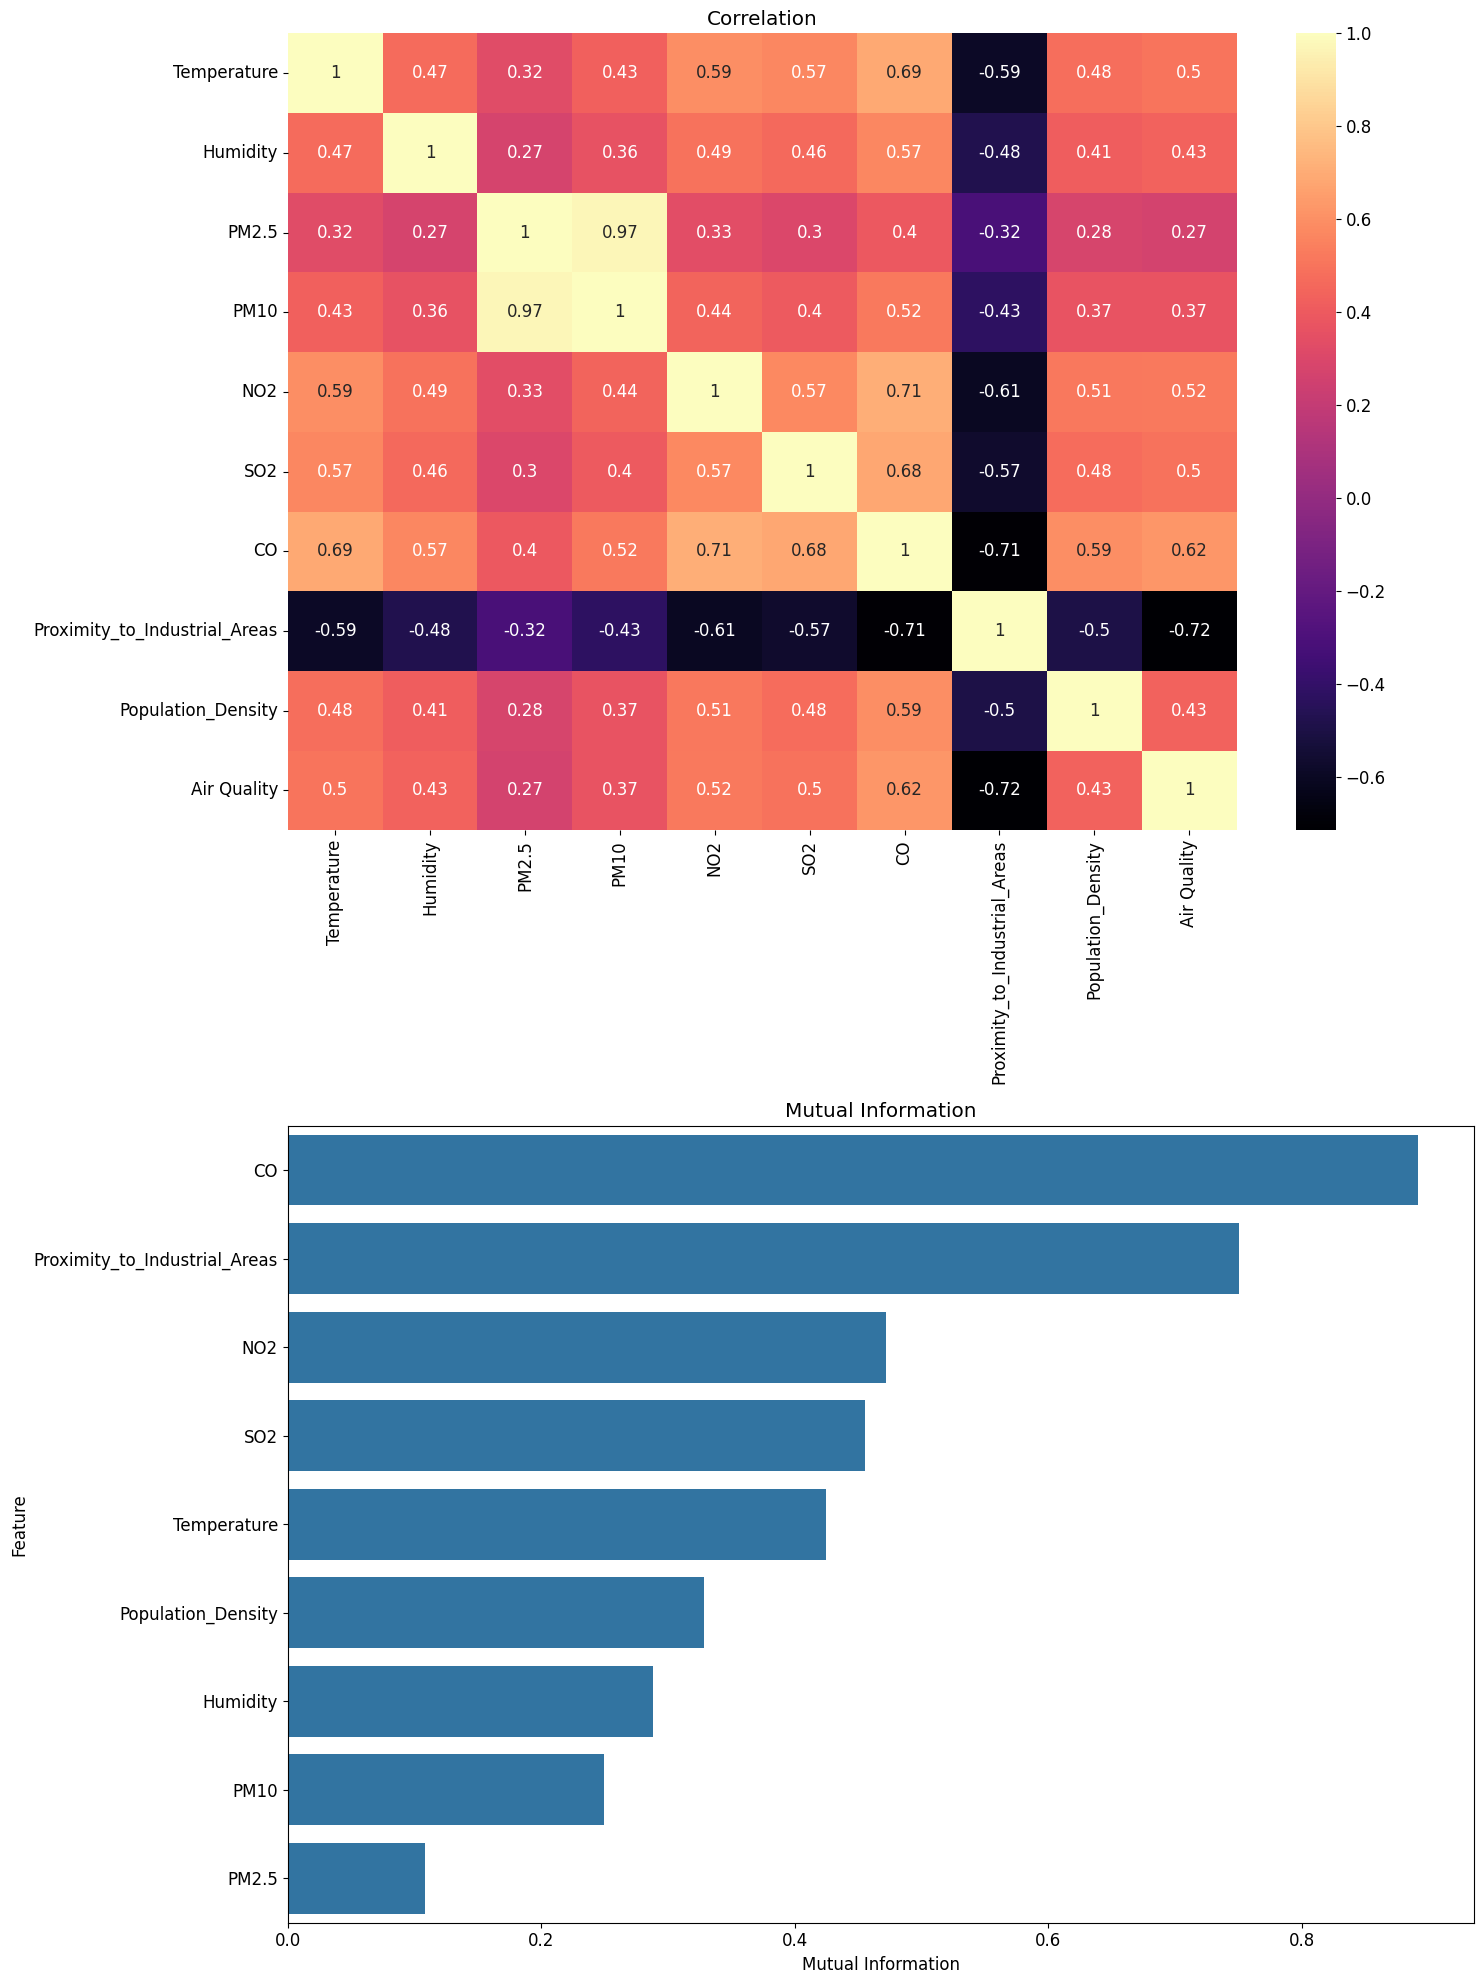

In [59]:
tdf=df.copy()  
x=tdf.drop(columns='Air Quality')
y=tdf['Air Quality']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

# Environmental Variables Relationship Analysis

## 🔍 Key Findings from Both Charts

---

### 1️⃣ Correlation Heatmap (Strongest Correlations)

#### ✅ Strong Positive Correlations:
| Pair | Coefficient | Source |
|-------|---------|--------|
| PM2.5 & PM10 | 0.97 | Same source (dust + emissions) |
| CO & NO2 | 0.71 | Vehicle exhaust |
| CO & SO2 | 0.68 | Fuel combustion |

#### ❌ Strong Negative Correlations:
| Pair | Coefficient | Interpretation |
|-------|---------|---------|
| Proximity & Pop Density | -0.72 | Crowded areas = close to industry |
| Proximity & CO | -0.71 | Far from industry = less CO |
| Proximity & NO2 | -0.61 | Far from industry = less NO2 |

---

### 2️⃣ Mutual Information (Variable Importance)

| Rank | Variable | Importance |
|------|---------|------------|
| **1** | **Proximity_to_Industrial_Areas** | Very High 🔴 |
| **2** | **CO** | High 🟠 |
| **3** | **NO2** | Medium-High 🟡 |
| **4** | **SO2** | Medium-High 🟡 |
| **5** | **PM10 / PM2.5** | Medium 🟢 |
| **6** | **Population Density** | Medium-Low 🔵 |
| **7** | **Temperature / Humidity** | Low ⚪ |

---

##  Final Summary

###  Top 3 Variables for Air Quality Prediction:
1. **Proximity to Industrial Areas** (most important)
2. **Carbon Monoxide (CO)** (traffic indicator)
3. **Nitrogen Dioxide (NO2)** (vehicle emissions)

###  Main Pollution Sources:
- **Vehicle emissions:** CO + NO2
- **Industrial activity:** SO2 + Proximity
- **Mixed sources:** PM2.5 + PM10

###  Less Important Variables (can be dropped):
- Temperature 🌡️
- Humidity 💧

In [60]:
X= df.drop(columns="Air Quality")
y= df['Air Quality']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45)

In [62]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.187553
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.500000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [63]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=1),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=1, use_label_encoder=False),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=1),
    "LightGBM": LGBMClassifier(random_state=1)
}

  0%|          | 0/12 [00:00<?, ?it/s]


========== Logistic Regression ==========


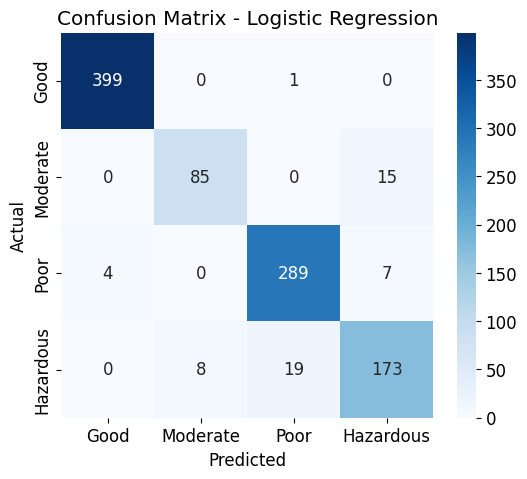

  8%|▊         | 1/12 [00:00<00:07,  1.40it/s]


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       0.91      0.85      0.88       100
           2       0.94      0.96      0.95       300
           3       0.89      0.86      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000


========== KNN ==========


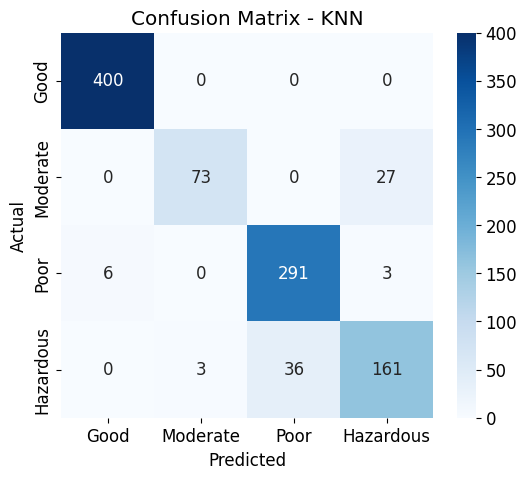

 17%|█▋        | 2/12 [00:01<00:09,  1.03it/s]


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       0.96      0.73      0.83       100
           2       0.89      0.97      0.93       300
           3       0.84      0.81      0.82       200

    accuracy                           0.93      1000
   macro avg       0.92      0.88      0.89      1000
weighted avg       0.93      0.93      0.92      1000


========== Decision Tree ==========


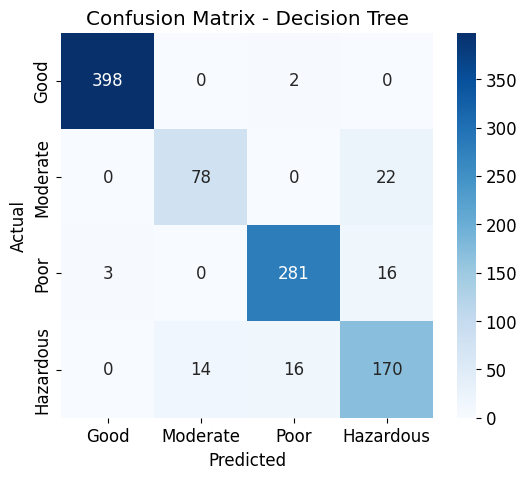

 25%|██▌       | 3/12 [00:02<00:07,  1.24it/s]


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.85      0.78      0.81       100
           2       0.94      0.94      0.94       300
           3       0.82      0.85      0.83       200

    accuracy                           0.93      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.93      0.93      0.93      1000


========== Naive Bayes ==========


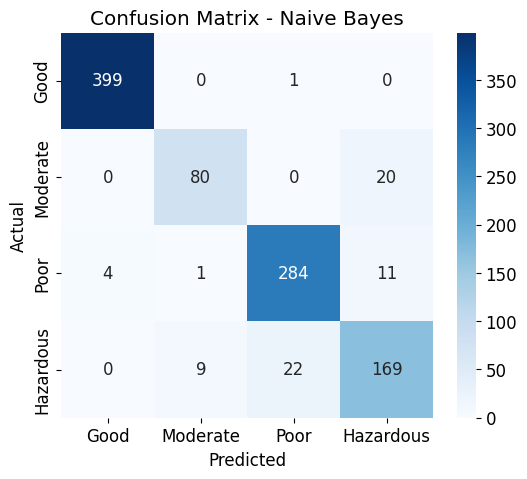

 33%|███▎      | 4/12 [00:03<00:05,  1.37it/s]


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       0.89      0.80      0.84       100
           2       0.93      0.95      0.94       300
           3       0.84      0.84      0.84       200

    accuracy                           0.93      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000


========== Random Forest ==========


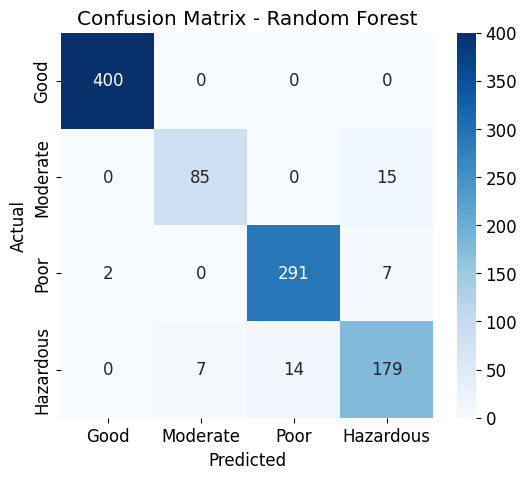

 42%|████▏     | 5/12 [00:06<00:11,  1.64s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.92      0.85      0.89       100
           2       0.95      0.97      0.96       300
           3       0.89      0.90      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000


========== Extra Trees ==========


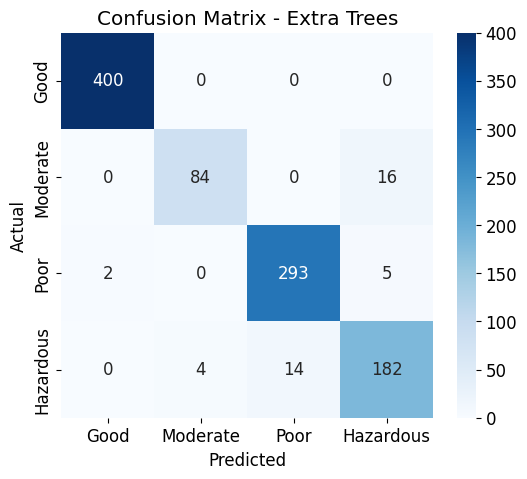

 50%|█████     | 6/12 [00:07<00:09,  1.62s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.95      0.84      0.89       100
           2       0.95      0.98      0.97       300
           3       0.90      0.91      0.90       200

    accuracy                           0.96      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000


========== AdaBoost ==========


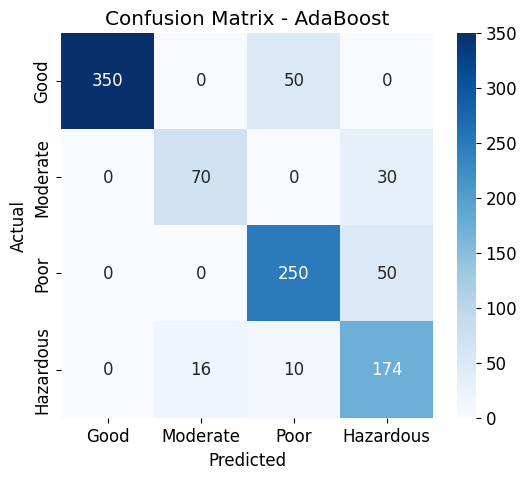

 58%|█████▊    | 7/12 [00:09<00:07,  1.44s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       400
           1       0.81      0.70      0.75       100
           2       0.81      0.83      0.82       300
           3       0.69      0.87      0.77       200

    accuracy                           0.84      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.86      0.84      0.85      1000


========== Gradient Boosting ==========


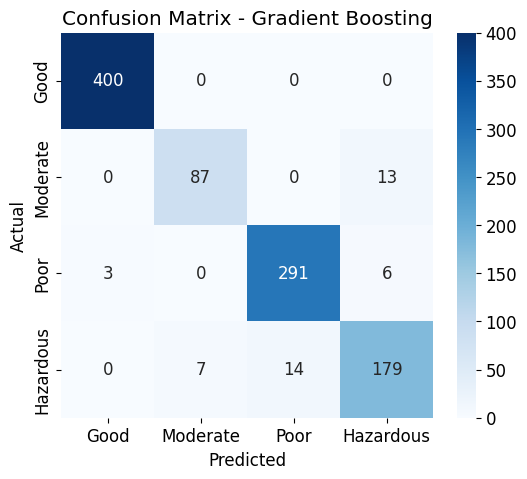

 67%|██████▋   | 8/12 [00:15<00:11,  2.90s/it]


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       400
           1       0.93      0.87      0.90       100
           2       0.95      0.97      0.96       300
           3       0.90      0.90      0.90       200

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000


========== Hist Gradient Boosting ==========


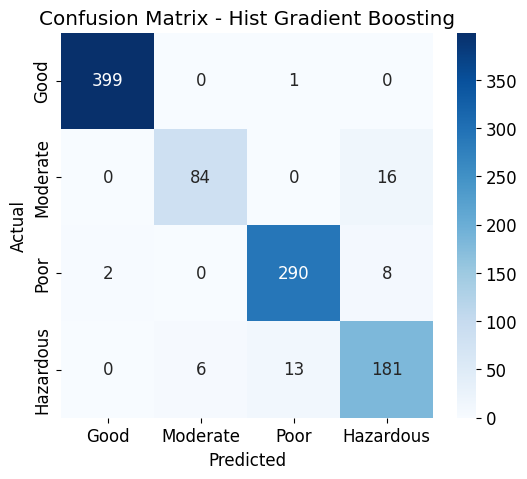

 75%|███████▌  | 9/12 [00:18<00:08,  2.93s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.93      0.84      0.88       100
           2       0.95      0.97      0.96       300
           3       0.88      0.91      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000


========== XGBoost ==========


d:\saifproject\Tasks_NTI_ML\updated_pollution_dataset deployment\.venv\lib\site-packages\xgboost\training.py:200: UserWarning: [02:34:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


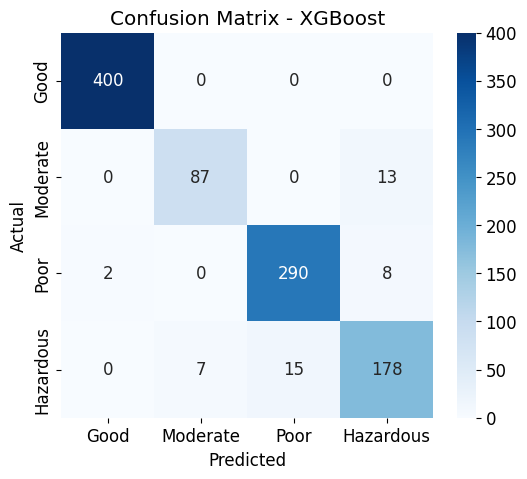

 83%|████████▎ | 10/12 [00:19<00:04,  2.33s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.93      0.87      0.90       100
           2       0.95      0.97      0.96       300
           3       0.89      0.89      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000


========== CatBoost ==========


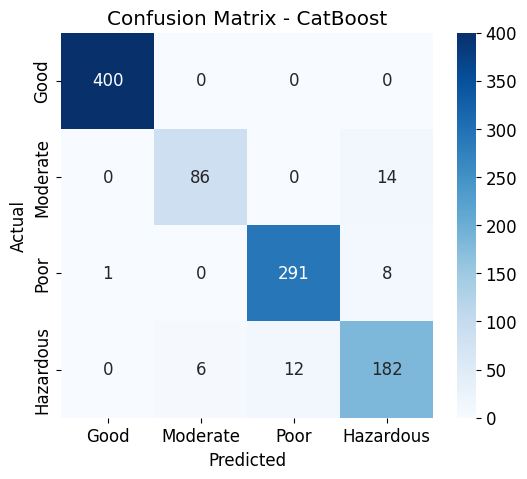

 92%|█████████▏| 11/12 [00:30<00:05,  5.25s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.93      0.86      0.90       100
           2       0.96      0.97      0.97       300
           3       0.89      0.91      0.90       200

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000


========== LightGBM ==========
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2189
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.916291
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[Ligh

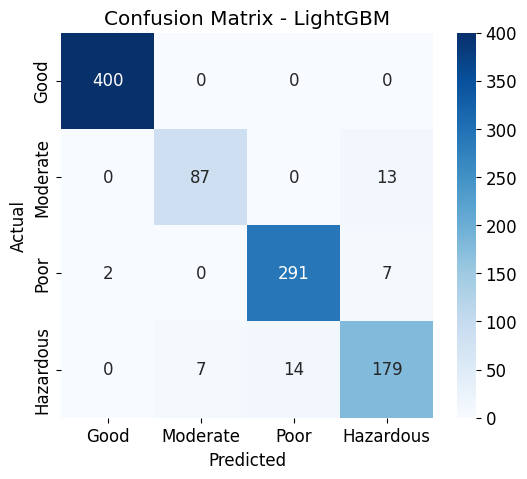

100%|██████████| 12/12 [00:31<00:00,  2.64s/it]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.93      0.87      0.90       100
           2       0.95      0.97      0.96       300
           3       0.90      0.90      0.90       200

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Balanced Accuracy,Test Balanced Accuracy,ROC-AUC
CatBoost,0.99925,0.959,0.999252,0.959031,0.99925,0.959,0.999250,0.958834,0.999062,0.935000,0.995320
Gradient Boosting,0.99000,0.957,0.990049,0.956613,0.99000,0.957,0.989986,0.956691,0.983437,0.933750,0.994870
LightGBM,1.00000,0.957,1.000000,0.956692,1.00000,0.957,1.000000,0.956737,1.000000,0.933750,0.994471
XGBoost,1.00000,0.955,1.000000,0.954704,1.00000,0.955,1.000000,0.954743,1.000000,0.931667,0.994630
Extra Trees,1.00000,0.959,1.000000,0.959094,1.00000,0.959,1.000000,0.958630,1.000000,0.931667,0.995196
Random Forest,1.00000,0.955,1.000000,0.954740,1.00000,0.955,1.000000,0.954693,1.000000,0.928750,0.993203
Hist Gradient Boosting,1.00000,0.954,1.000000,0.954108,1.00000,0.954,1.000000,0.953768,1.000000,0.927292,0.994250
Logistic Regression,0.94300,0.946,0.942482,0.945446,0.94300,0.946,0.942633,0.945511,0.911927,0.918958,0.992432
Naive Bayes,0.92475,0.932,0.924602,0.931443,0.92475,0.932,0.924605,0.931445,0.890625,0.897292,0.989957
Decision Tree,1.00000,0.927,1.000000,0.927191,1.00000,0.927,1.000000,0.926889,1.000000,0.890417,0.933487


In [65]:
results = {}
classes = ['Good', 'Moderate', 'Poor', 'Hazardous']
for name, model in tqdm(models.items()):
    print(f"\n========== {name} ==========")
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Precision": precision_score(y_train, train_pred, average='weighted'),
        "Test Precision": precision_score(y_test, test_pred, average='weighted'),
        "Train Recall": recall_score(y_train, train_pred, average='weighted'),
        "Test Recall": recall_score(y_test, test_pred, average='weighted'),
        "Train F1 Score": f1_score(y_train, train_pred, average='weighted'),
        "Test F1 Score": f1_score(y_test, test_pred, average='weighted'),
        "Train Balanced Accuracy": balanced_accuracy_score(y_train, train_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, test_pred),
        "ROC-AUC": roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    }
    cm = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("\nClassification Report:\n")
    print(classification_report(y_test, test_pred, zero_division=0))
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Test Balanced Accuracy", ascending=False)
results_df

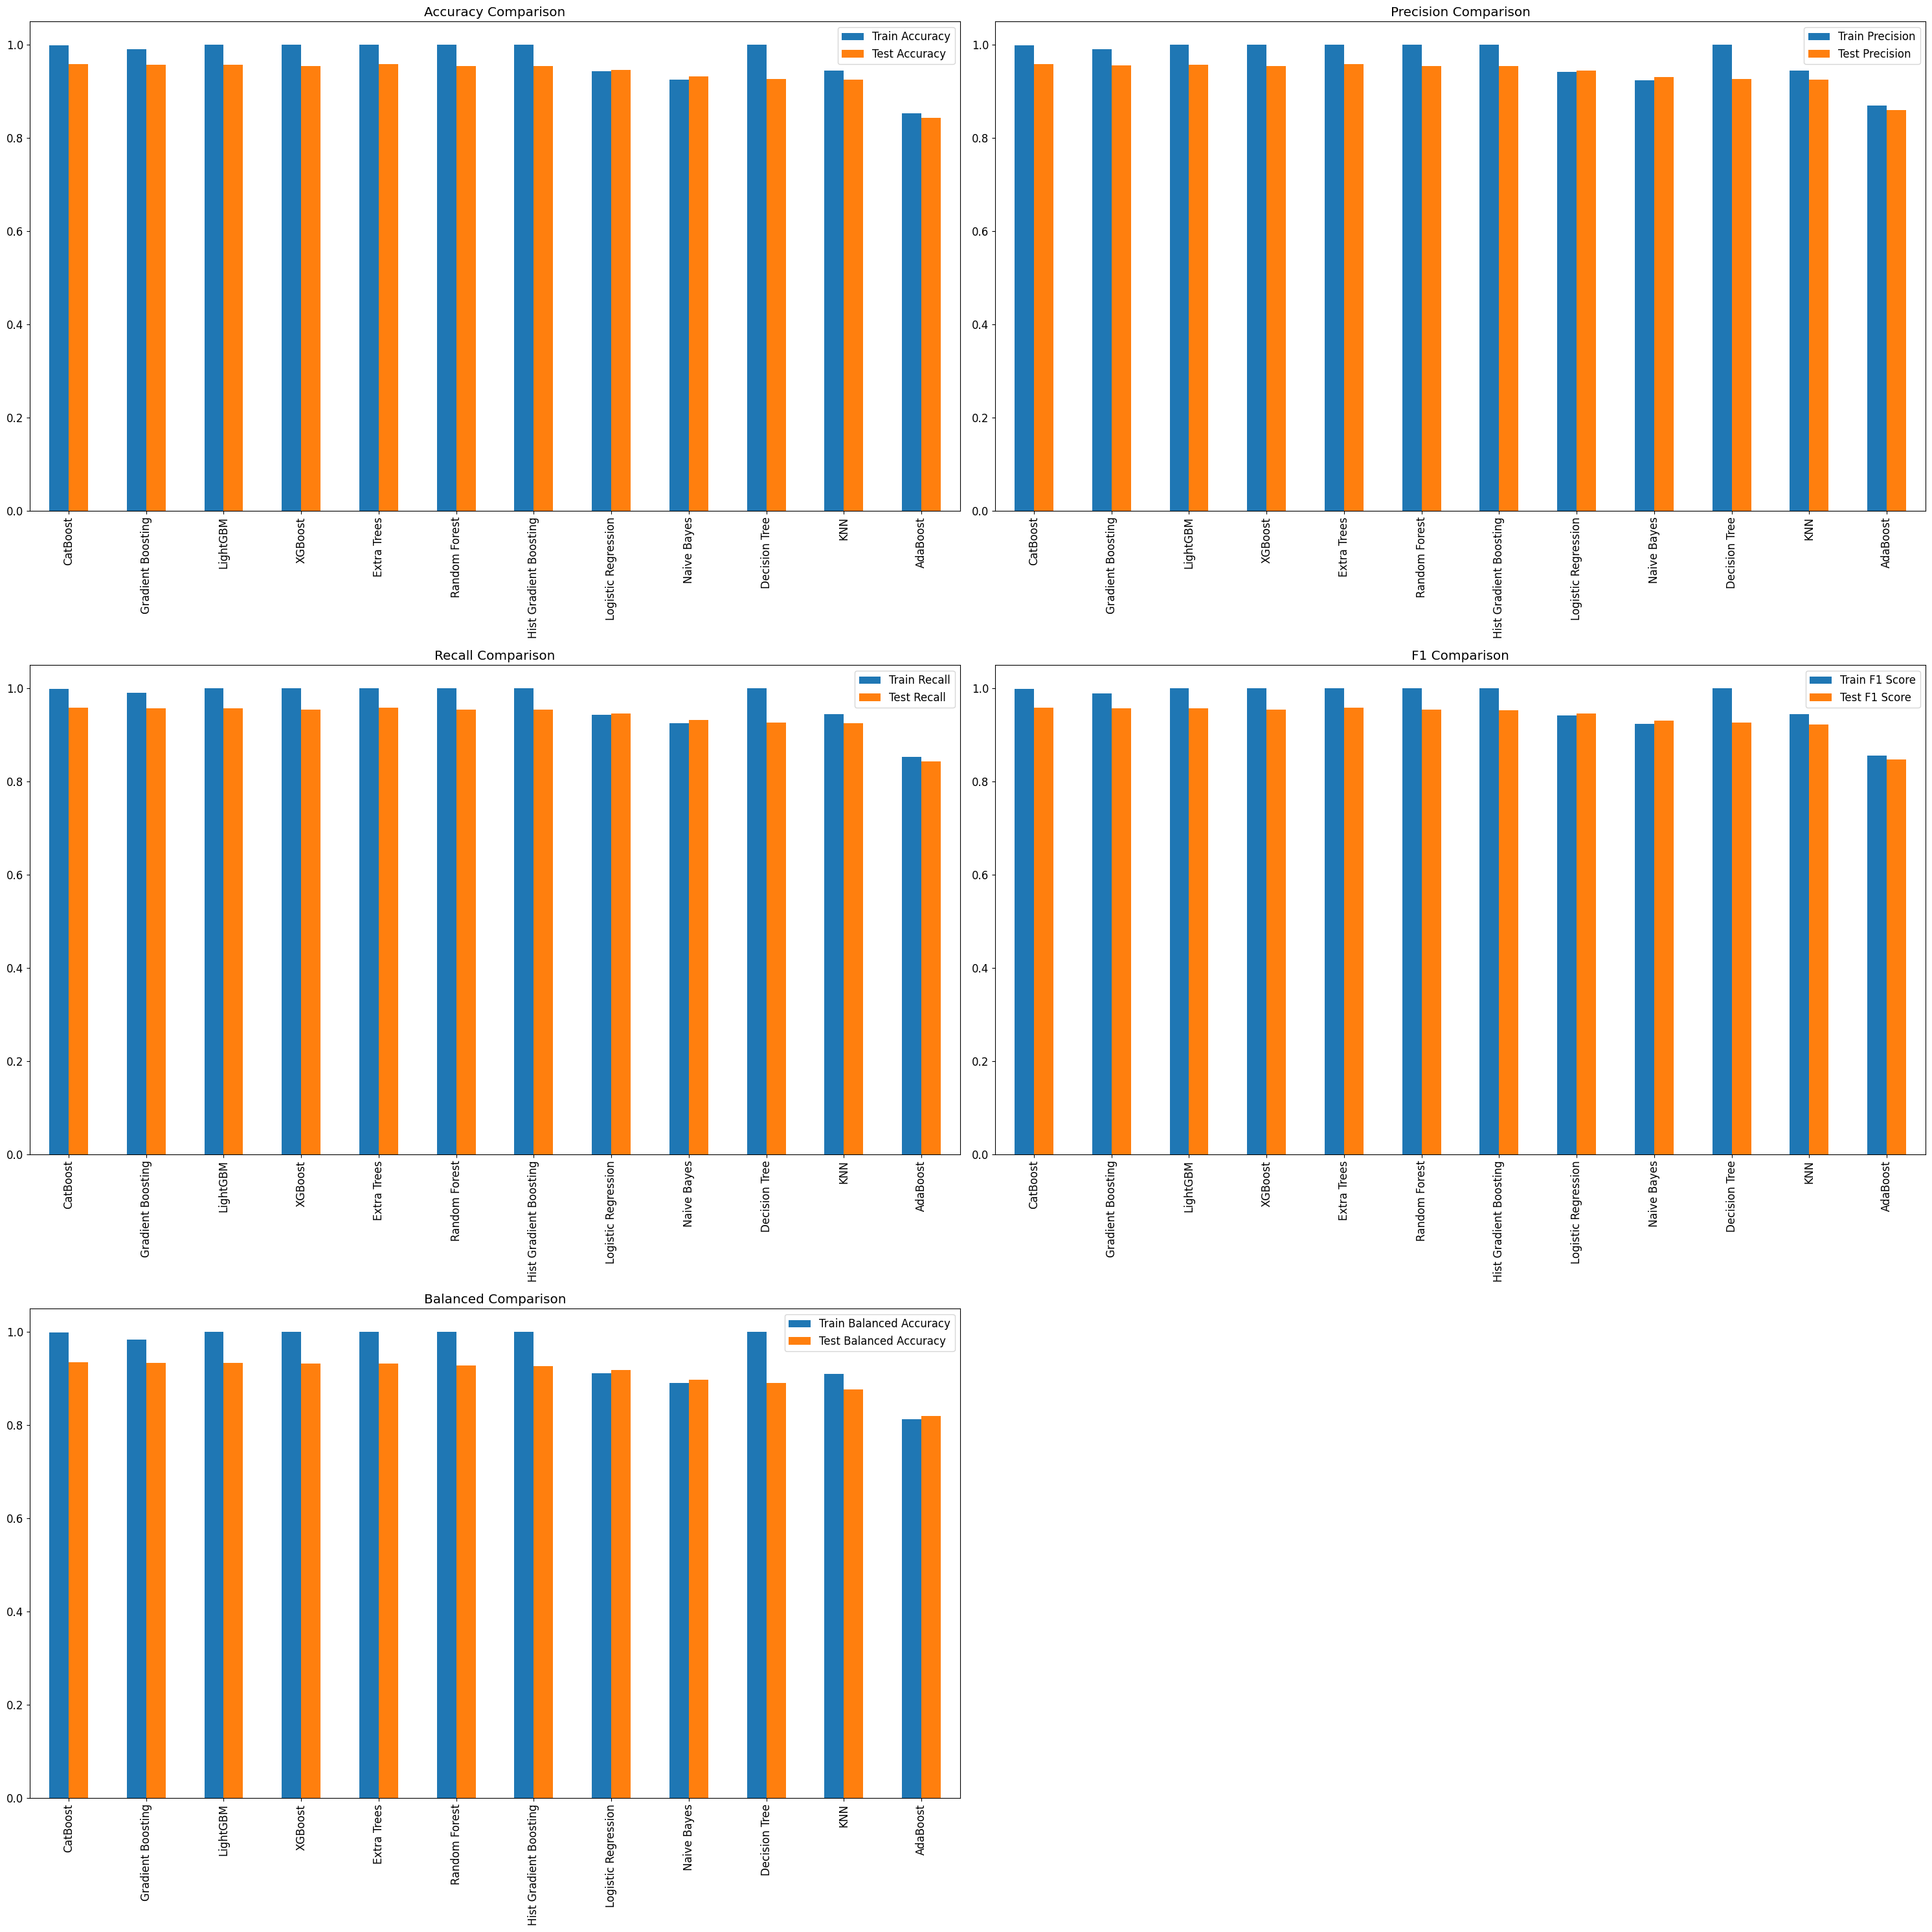

In [66]:
cols = [
    ['Train Accuracy', 'Test Accuracy'],
    ['Train Precision', 'Test Precision'],
    ['Train Recall', 'Test Recall'],
    ['Train F1 Score', 'Test F1 Score'],
    ["Train Balanced Accuracy", "Test Balanced Accuracy"]
]

plt.figure(figsize=(30,30))

for i, col in enumerate(cols):
    ax = plt.subplot(3, 2, i+1)   
    results_df[col].plot.bar(ax=ax)   
    ax.set_title(col[0].split(" ")[1] + ' Comparison')

plt.tight_layout()
plt.show()

<Axes: >

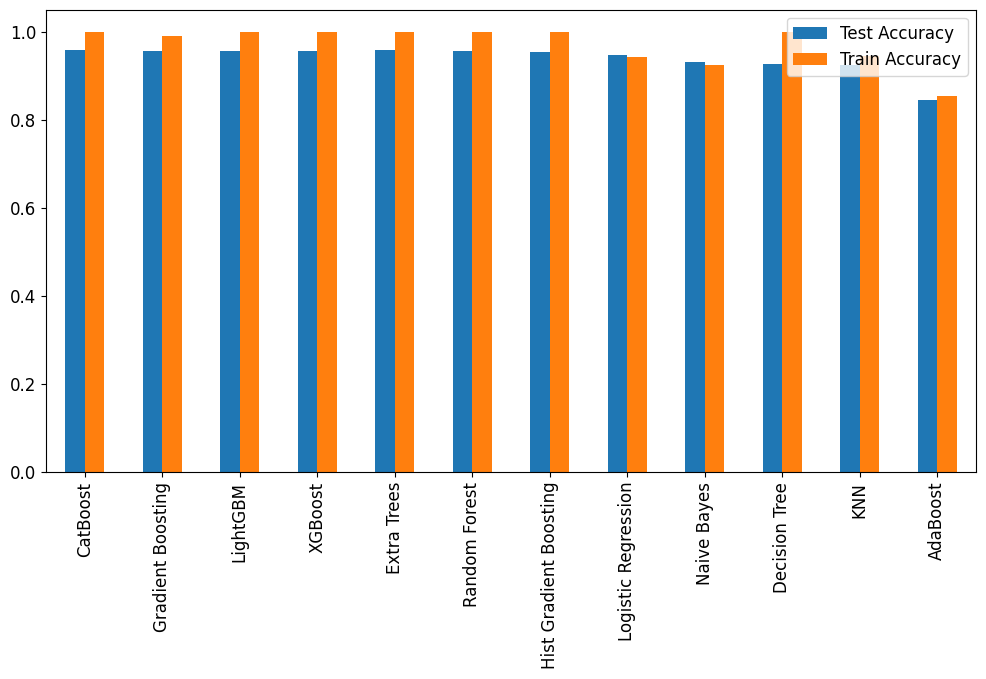

In [67]:
results_df[["Test Accuracy", "Train Accuracy"]].plot.bar(figsize=(12,6))

In [68]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Learning rate set to 0.084924
0:	learn: 1.2219543	total: 13.2ms	remaining: 13.2s
1:	learn: 1.0940476	total: 24ms	remaining: 12s
2:	learn: 0.9921258	total: 34.3ms	remaining: 11.4s
3:	learn: 0.9067172	total: 45ms	remaining: 11.2s
4:	learn: 0.8322524	total: 55.9ms	remaining: 11.1s
5:	learn: 0.7682549	total: 67.3ms	remaining: 11.2s
6:	learn: 0.7111066	total: 78.6ms	remaining: 11.2s
7:	learn: 0.6605819	total: 89.7ms	remaining: 11.1s
8:	learn: 0.6201245	total: 100ms	remaining: 11.1s
9:	learn: 0.5783739	total: 113ms	remaining: 11.2s
10:	learn: 0.5434070	total: 126ms	remaining: 11.3s
11:	learn: 0.5119782	total: 140ms	remaining: 11.5s
12:	learn: 0.4822674	total: 153ms	remaining: 11.6s
13:	learn: 0.4577217	total: 165ms	remaining: 11.7s
14:	learn: 0.4358957	total: 179ms	remaining: 11.7s
15:	learn: 0.4142260	total: 192ms	remaining: 11.8s
16:	learn: 0.3953231	total: 206ms	remaining: 11.9s
17:	learn: 0.3749114	total: 218ms	remaining: 11.9s
18:	learn: 0.3582361	total: 230ms	remaining: 11.9s
19:	learn